In [ ]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
541,entertainment,mumbai bombs movie postponed the release of a ...
422,sport,scots suffer another injury blow scotland s ba...
157,business,gm ford cut output as sales fall us car firms...
1543,politics,best person for top legal job the best perso...
608,politics,probe launched on ken nazi jibe an investigati...
...,...,...
1562,entertainment,manics in charge of bbc 6 music the manic stre...
18,business,japanese banking battle at an end japan s sumi...
1371,politics,concerns at school diploma plan final appeals ...
164,politics,ukip candidate suspended eurosceptic party uki...


In [ ]:
df = df.dropna()

In [ ]:
#No of a categories
len(set(df['category']))

5

In [ ]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

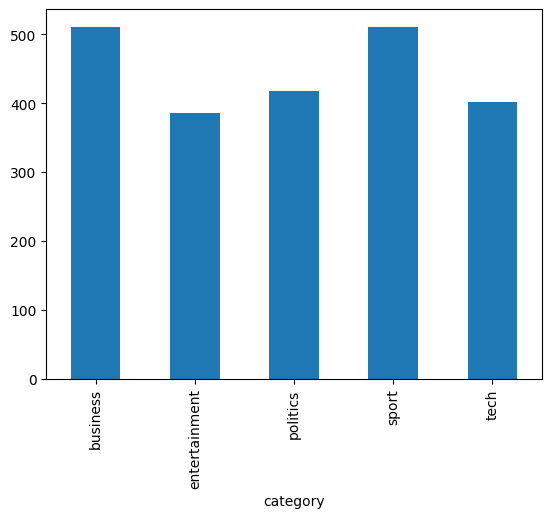

In [ ]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [ ]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
a = "Hello_World!243"
regs = re.sub("[^a-zA-Z]", " ", a)
regs

'Hello World    '

In [ ]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['text'][126]).lower()
regs

'ibm frees     software patents computer giant ibm says     of its software patents will be released into the open development community   the move means developers will be able to use the technologies without paying for a licence from the company  ibm described the step as a  new era  in how it dealt with intellectual property and promised further patents would be made freely available  the patents include software for a range of practices  including text recognition and database management  traditional technology business policy is to amass patents and despite ibm s announcement the company continues to follow this route   ibm was granted       patents in       more than any other firm in the us  the new york times reports  for each of the past    years ibm has been granted more us patents than any other company  ibm has received        us patents in that period and reportedly has more than        current patents  in a statement  dr john e  kelly  ibm senior vice president  technolog

In [ ]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
print(data)
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

['I', 'am', 'loving', 'computing']


'i am love comput'

In [ ]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = df['text'][0].split()
print(data)
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high-definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time.', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes.', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices.', 'one', 'of', 'the', 'most', 'talked-about', 'technologies', 'of', 'ces', 'has', 

'tv futur in the hand of viewer with home theatr system plasma high-definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time. that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes. with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices. one of the most talked-about technolog of ce ha been digit and person video record (dvr and pvr). these set-top box like the us s tivo and the uk s sky+ system allow peopl to record store play paus and forward wind tv programm when they want. essenti the technolog allow for much more personalis tv. they are also be built-in to high-definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [ ]:
#removing stopwords
data = df['text'][0].split()
for i in words:
  if i in data:
    c = data.count(i)
    for j in range(c):
      data.remove(i)
" ".join(data)


'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming. people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms a

In [ ]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
print(words)
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

'ibm frees software patents computer giant ibm says software patents released open development community move means developers able use technologies without paying licence company ibm described step new era dealt intellectual property promised patents would made freely available patents include software range practices including text recognition database management traditional technology business policy amass patents despite ibm announcement company continues follow route ibm granted patents firm us new york times reports past years ibm granted us patents company ibm received us patents period reportedly current patents statement dr john e kelly ibm senior vice president technology intellectual property said true innovation leadership numbers patents granted innovating benefit customers partners society pledge today beginning new era ibm manage intellectual property past ibm supported non commercial operating system linux although critics said done attempt undermine microsoft company s

In [ ]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['cleaned'] = list(map(lambda x: " ".join([i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]),df['text']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,category,text,cleaned
541,entertainment,mumbai bombs movie postponed the release of a ...,mumbai bomb movi postpon releas film mumbai bo...
422,sport,scots suffer another injury blow scotland s ba...,scot suffer anoth injuri blow scotland back ro...
157,business,gm ford cut output as sales fall us car firms...,gm ford cut output sale fall us car firm gener...
1543,politics,best person for top legal job the best perso...,best person top legal job best person job appo...
608,politics,probe launched on ken nazi jibe an investigati...,probe launch ken nazi jibe investig standard b...
...,...,...,...
1562,entertainment,manics in charge of bbc 6 music the manic stre...,manic charg bbc music manic street preacher ta...
18,business,japanese banking battle at an end japan s sumi...,japanes bank battl end japan sumitomo mitsui f...
1371,politics,concerns at school diploma plan final appeals ...,concern school diploma plan final appeal made ...
164,politics,ukip candidate suspended eurosceptic party uki...,ukip candid suspend euroscept parti ukip suspe...


In [ ]:
# " ".join([stemmer.stem(i) for i in without_stop_words_of_a_news.lower().split()])

In [ ]:
# list(filter(lambda x: [stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['text']))

In [ ]:
# #cleaning dataset
# nltk.download('stopwords')
# stemmer = PorterStemmer()
# words = stopwords.words("english")
# words.extend(['a','an','the'])
# df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
# # df['newcleaned'] = [(i for i in list(df['cleaned'])).split() if i not in words ]
# df

In [ ]:
df.to_csv('cleaned_news.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [ ]:
# print(words)

In [ ]:
# words = stopwords.words("nepali")
# words

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [ ]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['cleaned']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#to use model
import pickle as pk
filename = 'LogisticRegression.pickle'
model = pk.load(open(filename, 'rb'))

In [ ]:
print(X_test,y_test)

950     uk discrimin roma govern immigr rule racial di...
2155    cheri accus attack bush cheri blair accus crit...
501     axa sun life cut bonu payment life insur axa s...
261     burren award egyptian contract british energi ...
332     jarr join fairytal celebr french musician jean...
                              ...                        
571     tori urg chang top tori deleg gather expect la...
1456    french wine get euro top french govern hand st...
822     johnni depp act outlaw johnni depp whose lates...
1516    falcon rebut charad claim concess bill critic ...
122     safeti alert gm recal car world biggest carmak...
Name: cleaned, Length: 334, dtype: object 950          politics
2155         politics
501          business
261          business
332     entertainment
            ...      
571          politics
1456         business
822     entertainment
1516         politics
122          business
Name: category, Length: 334, dtype: object


In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_test_news_cat = model.predict(X_test)
predict_train_news_cat = model.predict(X_train)
print("Test accuracy = ",accuracy_score(y_test,predict_test_news_cat))
print("Train accuracy = ",accuracy_score(y_train,predict_train_news_cat))
print('\n')

Test accuracy =  0.9670658682634731
Train accuracy =  0.9888947646747752




In [ ]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = KATHMANDU: Thamel, the bustling heart of Kathmandu's tourism sector, is set to transition into a round-the-clock hub starting April 13.  The Thamel Tourism Development Council has announced the commencement of full-time business operations in Thamel and Durbar Marga areas, coinciding with the Nepali New Year.  Council Chairperson Bhabiswor Sharma affirmed that all necessary arrangements have been finalized to facilitate continuous operation in these areas.  The District Administration Office, Kathmandu, will oversee security and management aspects to ensure a smooth transition.  Assistant Chief District Officer Hari Prasad Sharma assured that security measures have been meticulously planned to enforce the night-time business operations.  Additionally, safety protocols, formulated in consultation with stakeholders, will be strictly implemented.  All tourism-related establishments, including clubs, dance venues, and discos, will remain open, offering visitors and locals alik

               precision    recall  f1-score   support

     business       0.94      1.00      0.97        77
entertainment       0.97      0.98      0.97        59
     politics       0.98      0.98      0.98        63
        sport       0.96      1.00      0.98        71
         tech       1.00      0.86      0.92        64

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334

[[77  0  0  0  0]
 [ 0 58  1  0  0]
 [ 0  0 62  1  0]
 [ 0  0  0 71  0]
 [ 5  2  0  2 55]]


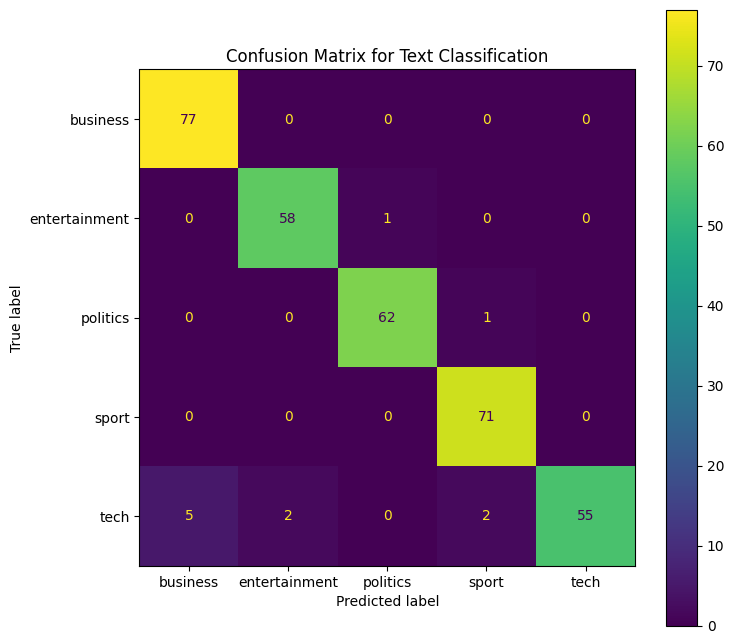

In [ ]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Text Classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);